In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

### 1. RNSA Intracranial Hemorrhage Dataset Overview

#### Intracranial Hemorrhage Types
![img](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F603584%2F56162e47358efd77010336a373beb0d2%2Fsubtypes-of-hemorrhage.png?generation=1568657910458946&alt=media)

#### Dataset Overview
- Train.csv: include the ID and Label:
 - ID is a combined string that includes the image filename and Hemorrhage type. 
 - Label is a target column,  indicating the probability of whether that type of hemorrhage exists in the indicated image. 
   Format:
   [Image Id]_[Sub-type_Name], as follows:
   - Id,Label
   - 1_epidural_hemorrhage,0
   - 1_intraparenchymal_hemorrhage,0
   - 1_intraventricular_hemorrhage,0
   - 1_subarachnoid_hemorrhage,0.6
   - 1_subdural_hemorrhage,0
   - 1_any,0.9
   
    
  - DICOM Images:
   - DICOM is the standard for the communication and management of medical imaging information and related data.
   - It can be exchanged between two entities that are capable of receiving image and patient data in DICOM format.  
   - Images contain associated metadata. This will include PatientID, StudyInstanceUID, SeriesInstanceUID, and other features.
   
 #### Data Files

   - **stage_1_train.csv** - Contains Ids and target information.
   - **stage_1_train_images.zip** and **stage_1_test_images.zip** - DICOM images -

  


In [2]:
import glob, pylab, pandas as pd
import pydicom, numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pylab as plt
import os
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

### 2. Train.csv Dataset EDA

In [4]:
train_df = pd.read_csv('../input/rsna-intracranial-hemorrhage-detection/stage_1_train.csv')
train_df.head()

,ID,Label
0,ID_63eb1e259_epidural,0
1,ID_63eb1e259_intraparenchymal,0
2,ID_63eb1e259_intraventricular,0
3,ID_63eb1e259_subarachnoid,0
4,ID_63eb1e259_subdural,0


In [5]:
print("Training Dataset's shape:", train_df.shape)

Training Dataset's shape: (4045572, 2)


In [6]:
train_df['Label'].value_counts()

0    3814760
1     230812
Name: Label, dtype: int64

### Label Values Overview

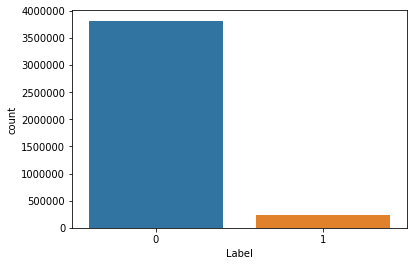

In [7]:
sns.countplot(train_df.Label)

####  Analysis the ID
- Format:[Image Id]_[Sub-type_Name]

In [8]:

train_df['Sub_type'] = train_df['ID'].str.split("_", n = 3, expand = True)[2]
train_df['Img_file_name'] = train_df['ID'].str.rsplit("_", n =1, expand = True)[0]
train_df.head()


,ID,Label,Sub_type,Img_file_name
0,ID_63eb1e259_epidural,0,epidural,ID_63eb1e259
1,ID_63eb1e259_intraparenchymal,0,intraparenchymal,ID_63eb1e259
2,ID_63eb1e259_intraventricular,0,intraventricular,ID_63eb1e259
3,ID_63eb1e259_subarachnoid,0,subarachnoid,ID_63eb1e259
4,ID_63eb1e259_subdural,0,subdural,ID_63eb1e259


In [9]:
sub_type_summary = train_df.groupby('Sub_type').sum()
sub_type_summary

,Label
Sub_type,
any,97103
epidural,2761
intraparenchymal,32564
intraventricular,23766
subarachnoid,32122
subdural,42496


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

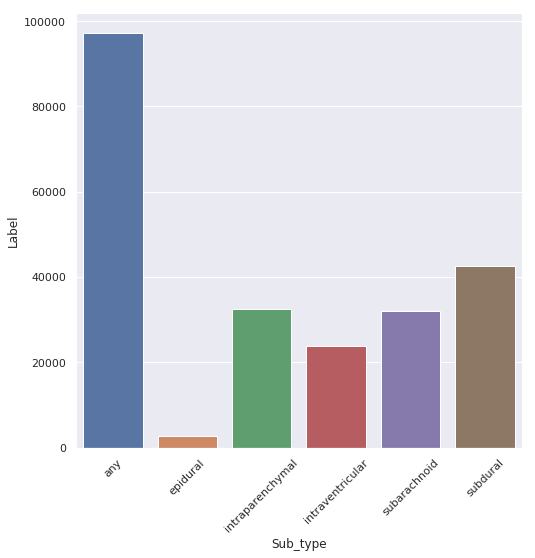

In [10]:
sns.set(rc={'figure.figsize':(8,8)})
plot = sns.barplot(x=sub_type_summary.index, y= sub_type_summary.Label)

plt.xticks(rotation=45)



Text(0.5, 1.0, 'Total Images by Subtype')

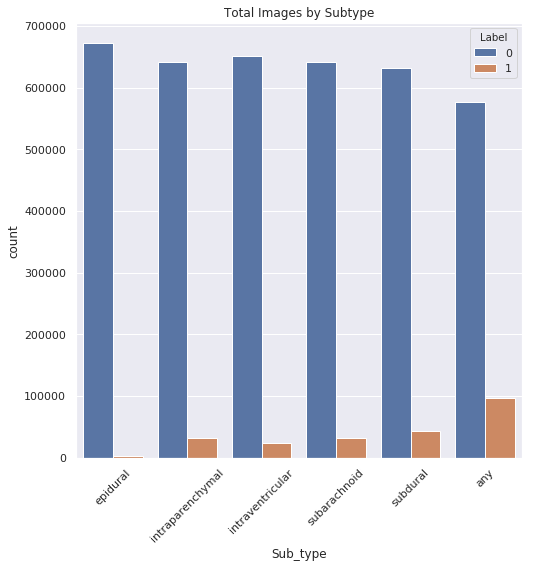

In [11]:
fig=plt.figure(figsize=(8, 8))

sns.countplot(x="Sub_type", hue="Label", data=train_df, palette="deep")
plt.xticks(rotation=45)
plt.title("Total Images by Subtype")

In [ ]:
#train_df.to_csv('subtype_train.csv')
#from IPython.display import FileLink, FileLinks
# FileLink('subtype_train.csv')

### DICOM Images Data EDA

In [12]:
# Train/Test Image Files Overview

train_imgs = sorted(glob.glob("../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/*.dcm"))
test_imgs = sorted(glob.glob("../input/rsna-intracranial-hemorrhage-detection/stage_1_test_images/*.dcm"))


In [13]:
print("total Train DICOM images: ", len(train_imgs))
print("Total Test DICOM images: ", len(test_imgs))

total Train DICOM images:  674258
Total Test DICOM images:  78545


### DICOM Images Overview

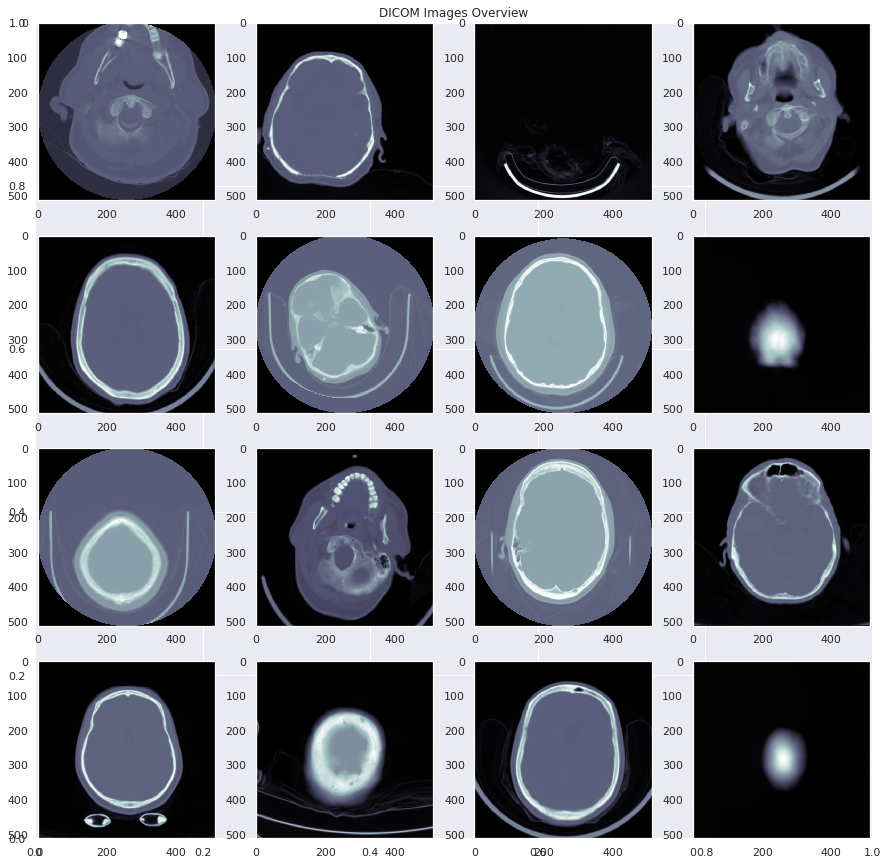

In [14]:
plot_dicom_all=plt.figure(figsize=(15, 15))
plt.title('DICOM Images Overview')
plt.rcParams["axes.grid"] = False
columns = 4; rows = 4
for i in range(1, columns*rows +1):
    dicom_img = pydicom.dcmread(train_imgs[i])
    plot_dicom_all.add_subplot(rows, columns,i)
    plt.imshow(dicom_img.pixel_array, cmap=plt.cm.bone)
    plot_dicom_all.add_subplot
    
    


### Get and Plot DICOM metadata

In [18]:
# Meta data structure
pydicom.dcmread(train_imgs[0])

(0008, 0018) SOP Instance UID                    UI: ID_000039fa0
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_eeaf99e7'
(0020, 000d) Study Instance UID                  UI: ID_134d398b61
(0020, 000e) Series Instance UID                 UI: ID_5f8484c3e0
(0020, 0010) Study ID                            SH: ''
(0020, 0032) Image Position (Patient)            DS: ['-125.000000', '-141.318451', '62.720940']
(0020, 0037) Image Orientation (Patient)         DS: ['1.000000', '0.000000', '0.000000', '0.000000', '0.968148', '-0.250380']
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0028, 0030) Pixel Spacing                       DS: ['0.488281', '0.488281']
(0028, 0100) Bits Allocated                      US: 16
(0028, 0101) Bits Stored 

In [16]:
def show_dicom_metadata(filename):
    """
    show_dicom_metadata function is to get all important DICOM metadata, such as windowing parameters and other information and also plot it
    input parameter:
    filename: string, DICOM filename
    """

    dataset = pydicom.dcmread(filename)
    # Normal mode:
    print()
    print("Filename.........:", filename)
    print("Storage type.....:", dataset['SOPInstanceUID'])
    print("Patient id.......:", dataset.PatientID)
    print("Modality.........:", dataset.Modality)
    print()
    print("Window Center.........:", dataset.WindowCenter)
    print('Window Width.........:',dataset.WindowWidth)
    print('Rescale Intercept.........:',dataset.RescaleIntercept)
    print('Rescale Slope.........:',dataset.RescaleSlope)


    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
                        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

    # use .get() if not sure the item exists, and want a default value if missing
    print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

    # plot the image using matplotlib
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()


Filename.........: ../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/ID_000039fa0.dcm
Storage type.....: (0008, 0018) SOP Instance UID                    UI: ID_000039fa0
Patient id.......: ID_eeaf99e7
Modality.........: CT

Window Center.........: 30
Window Width.........: 80
Rescale Intercept.........: -1024
Rescale Slope.........: 1
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: ['0.488281', '0.488281']
Slice location...: (missing)


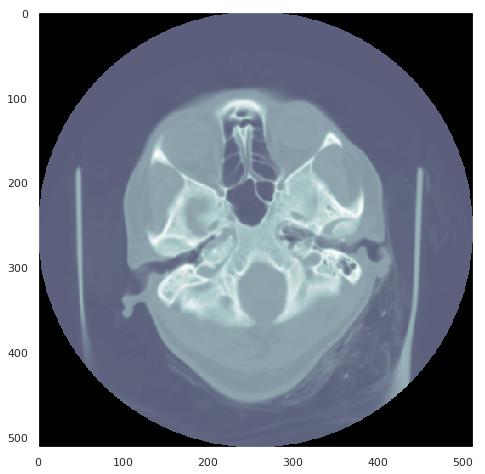

In [19]:
show_dicom_metadata(train_imgs[0])

In [20]:
def window_image(img, window_center,window_width, intercept, slope):

    img = (img*slope +intercept)
    img_min = window_center - window_width//2
    img_max = window_center + window_width//2
    img[img<img_min] = img_min
    img[img>img_max] = img_max
    return img 

def get_first_of_dicom_field_as_int(x):
    #get x[0] as in int is x is a 'pydicom.multival.MultiValue', otherwise get int(x)
    if type(x) == pydicom.multival.MultiValue:
        return int(x[0])
    else:
        return int(x)

def get_windowing(data):
    dicom_fields = [data[('0028','1050')].value, #window center
                    data[('0028','1051')].value, #window width
                    data[('0028','1052')].value, #intercept
                    data[('0028','1053')].value] #slope
    return [get_first_of_dicom_field_as_int(x) for x in dicom_fields]
    

In [21]:
base_path = '../input/rsna-intracranial-hemorrhage-detection/'
stage_1_train_images_path  = '../input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/'



def display_dicom_image(df, sub_type, column_number,row_number):
    
    """
    display_dicom_image function shows the DICOM imgae from the training dataset dataframe.
    df: data frame that includes the images and subtype information
    sub_type: string, what sub_type want to show
    column_number: int, how many images in a row
    row_number: int, how many rows want to show

    """
    # print(sub_type)
    if sub_type not in ['any','epidural','intraparenchymal','intraventricular','subarachnoid','subdural']:
        print('No this Type:',sub_type)
        return   
    
    images = df[(df['Sub_type'] == sub_type) & (train_df['Label'] == 1)][:(column_number*row_number)].Img_file_name.values
    
    fig, axs = plt.subplots(row_number, column_number, figsize=(15,15))
    
    
    for im in range(0, column_number*row_number):
        # print(images[im])
        # print(os.path.join(stage_1_train_images_path,images[im]+ '.dcm'))
        data = pydicom.read_file(os.path.join(stage_1_train_images_path,images[im]+ '.dcm'))
        
        image = data.pixel_array
        window_center , window_width, intercept, slope = get_windowing(data)
        image_windowed = window_image(image, window_center, window_width, intercept, slope)


        i = im // column_number
        j = im % column_number
        axs[i,j].imshow(image_windowed, cmap=plt.cm.bone) 
        axs[i,j].axis('off')
        
       
    plt.suptitle('Images of Hemorrhage Sub-type:' + sub_type )
    plt.show()


### Sub_type: Any

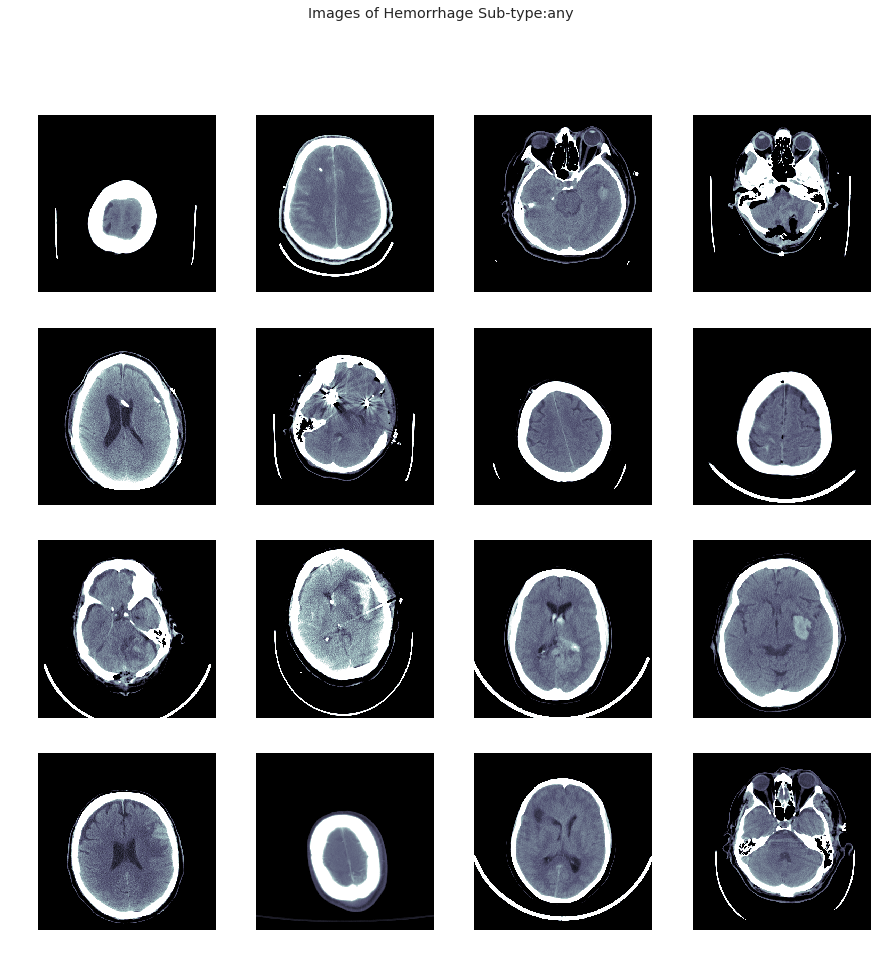

In [22]:
display_dicom_image(train_df, 'any', 4,4)

### Sub_Type: intraventricular

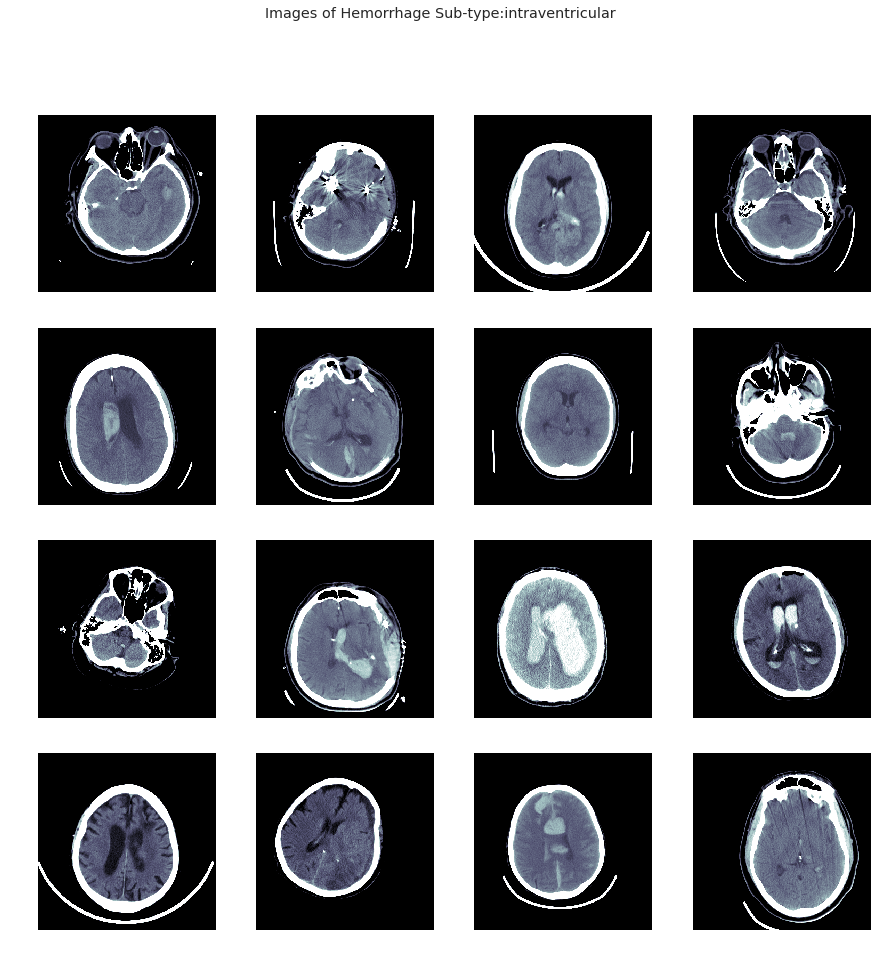

In [23]:
display_dicom_image(train_df, 'intraventricular', 4,4)

### Sub_Type: epidural

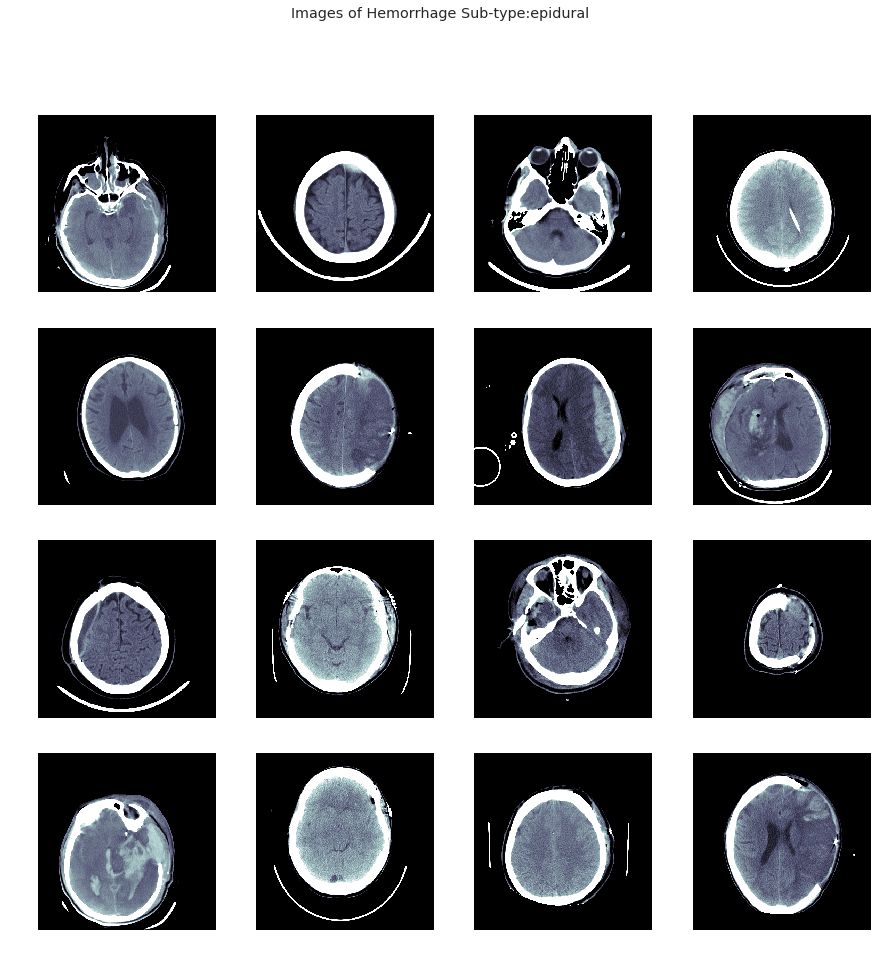

In [24]:
display_dicom_image(train_df, 'epidural', 4,4)

### Sub_Type: subarachnoid

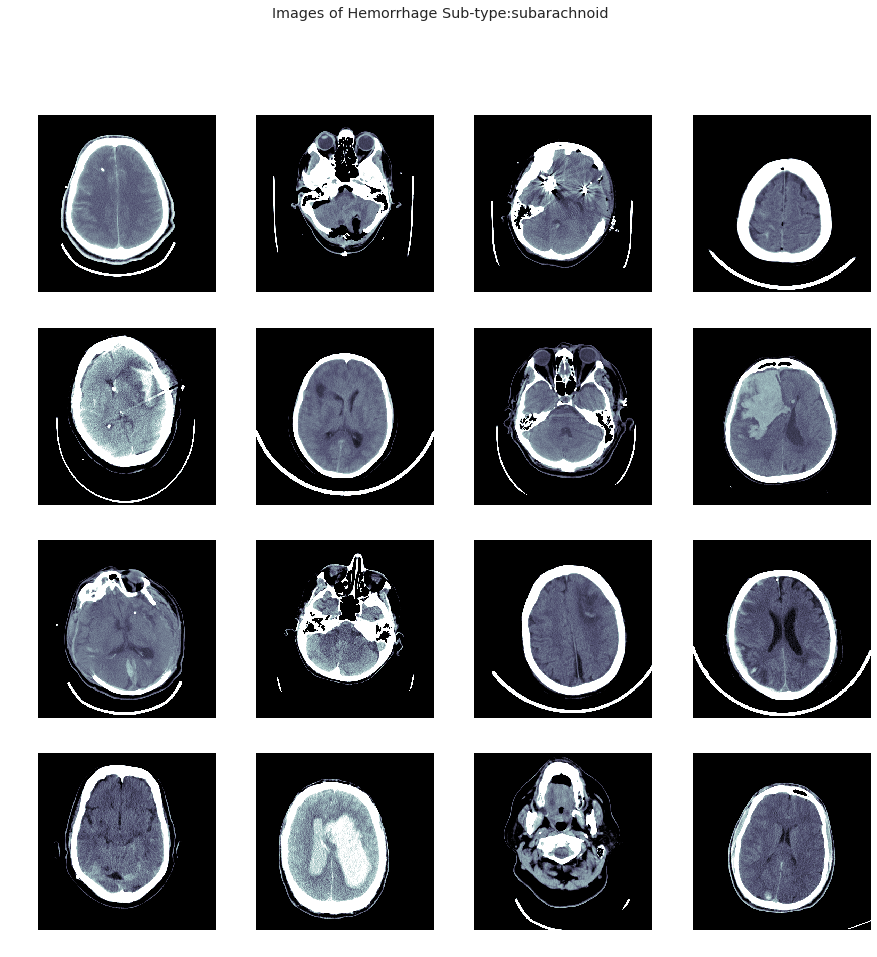

In [25]:
display_dicom_image(train_df, 'subarachnoid', 4,4)

### Sub_Type:intraventricular

In [ ]:
display_dicom_image(train_df, 'intraventricular', 4,4)